In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
import plotly.offline
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go

init_notebook_mode(connected=True)         # initiate notebook for offline plot
%matplotlib inline

In [2]:
X_train=pd.read_csv('data_set.csv') #读取数据
cpi_qtq=pd.read_csv('cpi_qtq.csv') #CPI的环比季节调整数据
cpi_tong=pd.read_csv('cpi_tong.csv') #CPI的同比数据

xgb_shap_first=pd.read_csv('XGboost的1st结果.csv')   # 原有数据
xgb_shap_second=pd.read_csv('替换为肉价.csv')  #将CPI食品替换为CPI肉类
xgb_shap_third=pd.read_csv('替换为m2.csv') #将新增贷款替换为M2
xgb_shap_fourth=pd.read_csv('同时替换m2和肉价.csv') # 替换为m2和CPI肉类价格

xgb_shap_industrial_first=pd.read_csv('替换工业+M2结果.csv')
xgb_shap_industrial_second=pd.read_csv('替换工业结果.csv')

xgb_shap_tong=pd.read_csv('同比结果.csv')

In [3]:
Date=X_train[X_train.columns[0]]
X_train=X_train.drop([X_train.columns[0]],axis=1)   #去掉多余的索引列
cpi_qtq=cpi_qtq.drop([cpi_qtq.columns[0]],axis=1)
cpi_tong=cpi_tong.drop([cpi_tong.columns[0]],axis=1)

cpi_tong=np.array(cpi_tong[0:228]).reshape((228,))
cpi_qtq=np.array(cpi_qtq[0:228]).reshape((228,))

xgb_shap_first=xgb_shap_first.drop([xgb_shap_first.columns[0]],axis=1)
xgb_shap_second=xgb_shap_second.drop([xgb_shap_second.columns[0]],axis=1)
xgb_shap_third=xgb_shap_third.drop([xgb_shap_third.columns[0]],axis=1)
xgb_shap_fourth=xgb_shap_fourth.drop([xgb_shap_fourth.columns[0]],axis=1)

xgb_shap_industrial_first=xgb_shap_industrial_first.drop([xgb_shap_industrial_first.columns[0]],axis=1)
xgb_shap_industrial_second=xgb_shap_industrial_second.drop([xgb_shap_industrial_second.columns[0]],axis=1)

xgb_shap_tong=xgb_shap_tong.drop([xgb_shap_tong.columns[0]],axis=1)

In [4]:
xgb_shap_first_columns=['GDP产出缺口','固定资产投资增速','房地产景气指数','社会消费品零售总额','出口额同比增速',
                 'CPI食品同比','求人倍率','通胀预期','银行间拆借利率','贷款基准利率','新增贷款','联合国粮农价格指数',
                'OPEC原油价格指数','人民币实际有效汇率','上证指数']  ##原始数据的变量名称

xgb_shap_second_columns=['GDP产出缺口','固定资产投资增速','房地产景气指数','社会消费品零售总额','出口额同比增速',
                 '求人倍率','通胀预期','银行间拆借利率','贷款基准利率','新增贷款','联合国粮农价格指数',
                'OPEC原油价格指数','人民币实际有效汇率','上证指数','CPI肉类同比']  ## 将原始数据集中的CPI食品替换为CPI肉类

xgb_shap_third_columns=['GDP产出缺口','固定资产投资增速','房地产景气指数','社会消费品零售总额','出口额同比增速',
                 'CPI食品同比','求人倍率','通胀预期','银行间拆借利率','贷款基准利率','联合国粮农价格指数',
                'OPEC原油价格指数','人民币实际有效汇率','上证指数','M2同比增速']   ## 将原始数据集中的新增贷款替换为M2

xgb_shap_fourth_columns=['GDP产出缺口','固定资产投资增速','房地产景气指数','社会消费品零售总额','出口额同比增速',
                 '求人倍率','通胀预期','银行间拆借利率','贷款基准利率','联合国粮农价格指数',
                'OPEC原油价格指数','人民币实际有效汇率','上证指数','CPI肉类同比','M2同比增速'] ## 同时替换为M2和CPI肉类

xgb_shap_industrial_first_colunms=['工业增加值缺口','固定资产投资增速','房地产景气指数','社会消费品零售总额','出口额同比增速',
                 'CPI食品同比','求人倍率','通胀预期','银行间拆借利率','贷款基准利率','联合国粮农价格指数',
                'OPEC原油价格指数','人民币实际有效汇率','上证指数','M2同比增速']     ##将原数据集的GDP缺口和新增贷款替换为工业增加值和M2

xgb_shap_industrial_second_colunms=['工业增加值缺口','固定资产投资增速','房地产景气指数','社会消费品零售总额','出口额同比增速',
                 'CPI食品同比','求人倍率','通胀预期','银行间拆借利率','贷款基准利率','新增贷款增速','联合国粮农价格指数',
                'OPEC原油价格指数','人民币实际有效汇率','上证指数']     ##将原数据集的GDP缺口替换为工业增加值


In [5]:
xgb_shap_first=np.array(xgb_shap_first)
xgb_shap_second=np.array(xgb_shap_second)
xgb_shap_third=np.array(xgb_shap_third)
xgb_shap_fourth=np.array(xgb_shap_fourth)

xgb_shap_industrial_first=np.array(xgb_shap_industrial_first)
xgb_shap_industrial_second=np.array(xgb_shap_industrial_second)

xgb_shap_tong=np.array(xgb_shap_tong)

In [6]:
all_train_data=pd.read_csv('所有数据集.csv') #所有的训练特征原始数据
all_train_data=all_train_data.drop([all_train_data.columns[0]],axis=1)
all_train_data.head()

,Industry_add,electricity,steel,cement,new_storage,Total_GDP,agriculture_gdp,industry_gdp,server_gdp,business_cyle_index,...,m1,m2,leverage_ratio,m2_gdp_ratio,un_food,crb_index,opec_oil,rmb_exchange,shangzheng,shenzheng
0,0.547771,9.680325,4.883442,13.082377,7.252,0.551997,1.163089,9.200000,0.624625,9.500000,...,16.8,15.16,-1.582278,-9.581120,53.8,225.746190,24.06,96.82,2088.886071,635.458214
1,0.627031,9.597488,6.433421,11.673613,5.900,0.359571,-0.054825,9.582601,0.111752,9.167370,...,16.4,15.20,-1.080582,-14.066498,54.2,224.133158,25.41,97.03,1955.280500,587.829278
2,0.595923,9.341491,8.027068,10.171160,7.730,0.190282,-0.960329,9.805307,-0.285379,8.860637,...,17.4,14.83,-0.543934,-27.264360,55.1,226.578636,23.70,98.05,2036.784091,616.486091
3,0.474671,9.073057,9.842559,8.708863,7.560,0.065469,-1.240740,9.708221,-0.451585,8.605699,...,15.0,13.94,0.062617,222.621984,54.6,226.476000,24.38,99.23,2135.006571,644.126857
4,0.259568,8.792528,11.606688,7.512484,7.600,-0.008405,-0.719223,9.199162,-0.320064,8.414526,...,14.9,14.48,0.750667,19.289512,55.4,229.809545,26.25,98.05,2185.525500,652.703389


## CPI同比和季调环比结果对比

### 1. 因变量CPI同比

这里请师兄看下以下的对比，CPI指标究竟是使用同比的效果更好，还是使用环比的效果更好。

In [7]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=Date[1:228], y=cpi_tong,line_shape='linear',name='CPI同比增长'))
fig.update_layout(title='CPI同比增长',xaxis_title='时间')
fig.show()

#### 双击图中的特征legend，可以直接单独调出该变量的影响大小

In [8]:
fig = go.Figure()
for i in range(xgb_shap_tong.shape[1]):
    fig.add_trace(go.Scatter(x=Date, y=xgb_shap_tong[0:228,i], name=xgb_shap_fourth_columns[i],line_shape='linear'))
fig.update_layout(title='数据集特征对通胀同比的影响分解',
                   xaxis_title='时间')
fig.show()

#### 对上面图的解释：  
  上图绘制了每个特征的SHAP值在样本区间内的变化。SHAP值的计算为：

$$
\hat{\phi}_j=\frac{1}{T}\sum_{t=1}^{T} (\hat{f}(x^t_{+j})-\hat{f}(x^t_{-j}))
$$  

其中$\hat{f}(x^t_{+j})$为<font color=red>样本$x^t$包含第$j$个特征时的预测结果</font>，$\hat{f}(x^t_{-j})$为<font color=red>样本$x^t$不包含第$j$个特征的预测结果</font>，$\hat{f}(x^t_{-j})$里通过对第$j$个特征进行随机抽取构造新样本，来消除第$j$个特征的影响。  


  所以上面特征$j$的在$t$时刻的SHAP值可解释为：在$t$时刻，CPI同比的值里中特征$j$贡献了多少。用回归里的语言来描述，我们建立的ML模型等价于回归模型$Y_t=X_t\beta+\varepsilon_t$，与回归中相似，在模型预测时不包括$\varepsilon_t$，所以第$j$个特征的SHAP值对应回归中就是$X_{jt}\beta_j$。而$\hat{Y_t}=\sum_{j=1}^{J} X_{jt}$，所以每个特征第$t$时刻的SHAP值之和就为ML模型在t时刻的拟合值。  
  
  #### 后面的图都可以以上的论述解释。

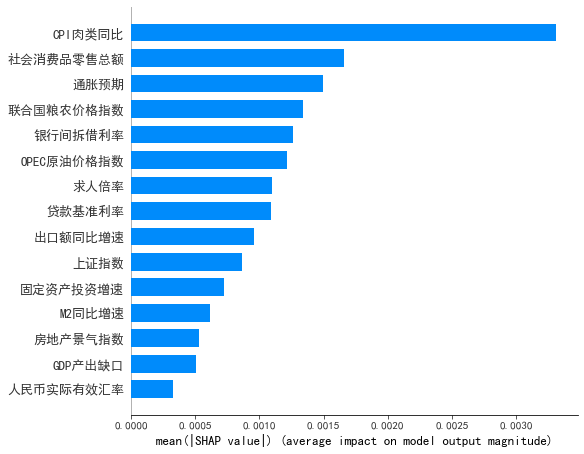

In [9]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
shap.summary_plot(xgb_shap_tong, xgb_shap_fourth_columns, plot_type="bar")

### 2.因变量为季节调整的CPI环比

In [10]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=Date[1:228], y=cpi_qtq,line_shape='linear',name='CPI季调增长'))
fig.update_layout(title='CPI环比季调',xaxis_title='时间')
fig.show()

In [11]:
import plotly.graph_objects as go
fig = go.Figure()
for i in range(xgb_shap_fourth.shape[1]):
    fig.add_trace(go.Scatter(x=Date, y=xgb_shap_fourth[1:228,i], name=xgb_shap_fourth_columns[i],line_shape='linear'))
fig.update_layout(title='数据集特征对季调环比CPI的影响分解',
                   xaxis_title='时间')
fig.show()

#### 环比CPI季调模型的特征重要性

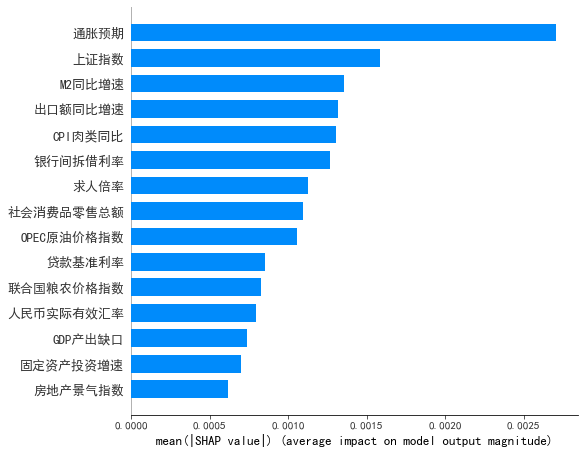

In [12]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
shap.summary_plot(xgb_shap_fourth, xgb_shap_fourth_columns, plot_type="bar")

## 替换不同特征后的影响对比

这部分对训练数据特征进行了不同的替换，主要结果的对比请见Excel表格，详细的对比见下面的几幅图。总体来看变量的整体重要性并没有发生太大的改变。

### 原始数据集

In [13]:
fig = go.Figure()
for i in range(xgb_shap_first.shape[1]):
    fig.add_trace(go.Scatter(x=Date, y=xgb_shap_first[1:228,i], name=xgb_shap_first_columns[i],line_shape='linear'))
fig.update_layout(title='原始数据集特征对通胀环比的影响分解',
                   xaxis_title='时间')
fig.show()

### 将数据集的CPI食品替换为CPI肉类

In [14]:
fig = go.Figure()
for i in range(xgb_shap_second.shape[1]):
    fig.add_trace(go.Scatter(x=Date, y=xgb_shap_second[:,i], name=xgb_shap_second_columns[i],line_shape='linear'))
fig.update_layout(title='包含CPI肉类的数据集特征对通胀环比的影响分解',
                   xaxis_title='时间')
fig.show()

### 将数据集的“新增贷款”替换为“M2”

In [15]:
fig = go.Figure()
for i in range(xgb_shap_third.shape[1]):
    fig.add_trace(go.Scatter(x=Date, y=xgb_shap_third[:,i], name=xgb_shap_third_columns[i],line_shape='linear'))
fig.update_layout(title='包含M2的数据集特征对通胀环比的影响分解',
                   xaxis_title='时间')
fig.show()

### 将数据集的“GDP产出缺口”替换为“工业增加值缺口”

In [16]:
fig = go.Figure()
for i in range(xgb_shap_industrial_second.shape[1]):
    fig.add_trace(go.Scatter(x=Date, y=xgb_shap_industrial_second[:,i], name=xgb_shap_industrial_second_colunms[i],line_shape='linear'))
fig.update_layout(title='包含工业增加值的数据集特征对通胀环比的影响分解',
                   xaxis_title='时间')
fig.show()

### 将数据集的“GDP产出缺口”和“新增贷款”替换为“工业增加值缺口”和“M2”

In [17]:
fig = go.Figure()
for i in range(xgb_shap_industrial_first.shape[1]):
    fig.add_trace(go.Scatter(x=Date, y=xgb_shap_industrial_first[:,i], name=xgb_shap_industrial_first_colunms[i],line_shape='linear'))
fig.update_layout(title='包含工业增加值的数据集特征对通胀环比的影响分解',
                   xaxis_title='时间')
fig.show()

### 将数据集的“CPI食品”和“新增贷款”替换为“CPI肉类”和“M2”

In [18]:
fig = go.Figure()
for i in range(xgb_shap_third.shape[1]):
    fig.add_trace(go.Scatter(x=Date, y=xgb_shap_fourth[:,i], name=xgb_shap_fourth_columns[i],line_shape='linear'))
fig.update_layout(title='包含M2和CPI肉类的数据集特征对通胀环比的影响分解',
                   xaxis_title='时间')
fig.show()